# State: explorative, nice to have, not finished

In [ ]:
from ema_workbench.analysis import parcoords
import pandas as pd
from ema_workbench import load_results
import seaborn as sns
from pandas import concat

sns.set(rc={'figure.figsize': (14, 10)})

In [2]:
# Set limits to be comparable across Belief Update functions
deffuant_exp, deffuant_out = load_results(
    '/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_all_DEFFUANT')
sample_exp, sample_out = load_results(
    '/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_all_SAMPLE')
sit_exp, sit_out = load_results('/Users/felicity/PycharmProjects/MisinfoPy/results/open_exploration_all_SIT')

deffuant_out = pd.DataFrame(deffuant_out)
sample_out = pd.DataFrame(sample_out)
sit_out = pd.DataFrame(sit_out)

out = pd.concat([deffuant_out, sample_out, sit_out])
limits = parcoords.get_limits(out)

In [3]:
# Add a column specifying the belief_update_fn that the data stems from
deffuant_exp['belief_update_fn'] = 'deffuant'
sample_exp['belief_update_fn'] = 'sample'
sit_exp['belief_update_fn'] = 'sit'

In [4]:
# Combine experiment data
exp = concat([deffuant_exp, sample_exp, sit_exp])
exp

,belief_metric_threshold,high_media_lit,mean_disinformer,mean_normal_user,n_edges,ratio_normal_user,mlit_select,del_t,rank_punish,rank_t,strikes_t,scenario,policy,model,belief_update_fn
0,75.370767,0.257776,8,0,2,0.980193,0,0,0,0,0,50,all off,MisinfoPy,deffuant
1,75.139738,0.254374,12,2,2,0.985124,0,0,0,0,0,51,all off,MisinfoPy,deffuant
2,77.597826,0.343077,9,0,3,0.994569,0,0,0,0,0,52,all off,MisinfoPy,deffuant
3,75.724120,0.282005,10,0,2,0.990572,0,0,0,0,0,53,all off,MisinfoPy,deffuant
4,77.149533,0.261958,9,1,3,0.986509,0,0,0,0,0,54,all off,MisinfoPy,deffuant
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,78.164410,0.273207,10,0,3,0.981515,10,5,10,5,5,145,all max,MisinfoPy,sit
96,79.166479,0.252258,12,0,2,0.991525,10,5,10,5,5,146,all max,MisinfoPy,sit
97,76.847346,0.333070,9,1,2,0.990283,10,5,10,5,5,147,all max,MisinfoPy,sit
98,78.393377,0.279361,9,0,3,0.994665,10,5,10,5,5,148,all max,MisinfoPy,sit


In [5]:
# Get unique policy names
unique_bufns = exp['belief_update_fn'].unique().tolist()

# Assign each unique policy a color
bufn_colors = {}

for _, (bufn, color) in enumerate(zip(unique_bufns, sns.color_palette())):
    bufn_colors[bufn] = color

In [7]:
bufn_colors

{'deffuant': (0.2980392156862745, 0.4470588235294118, 0.6901960784313725),
 'sample': (0.8666666666666667, 0.5176470588235295, 0.3215686274509804),
 'sit': (0.3333333333333333, 0.6588235294117647, 0.40784313725490196)}

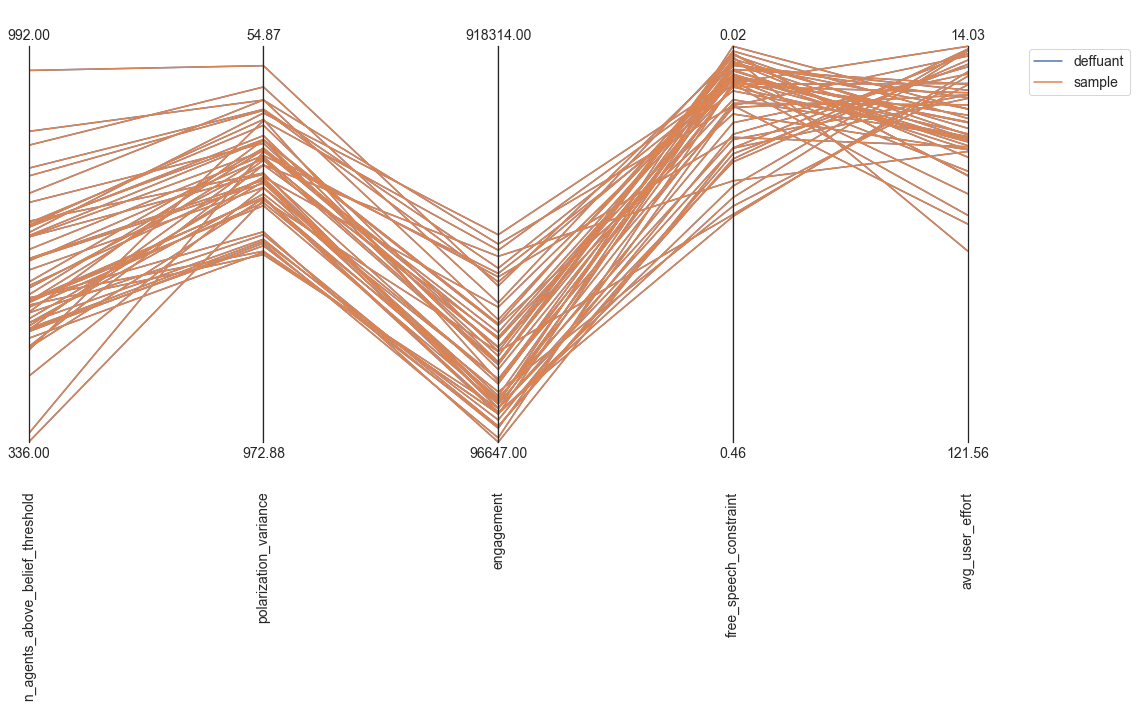

In [10]:
axes = parcoords.ParallelAxes(limits)

minimize = ['polarization_variance', 'free_speech_constraint', 'avg_user_effort']
for metric in minimize:
    axes.invert_axis(metric)

# All off policy, colored by BeliefUpdateFn
for bufn, color in bufn_colors.items():
    if bufn != 'sit' and bufn != 'sample':
        bufn_indices = list(exp[exp['belief_update_fn'] == bufn].index)
        indices = [i for i in bufn_indices if exp.iloc[i]['policy'] == 'all off']
        part = out.iloc[indices, :]
        axes.plot(part, color=color, label=bufn)

axes.legend()